In [5]:
using Pkg
Pkg.add("CSV")
Pkg.add("DataFrames")
Pkg.add("PyPlot")

  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
 Resolving package versions...
  Updating `~/.julia/environments/v1.1/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.1/Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `~/.julia/environments/v1.1/Project.toml`
  [a93c6f00] + DataFrames v0.18.3
  Updating `~/.julia/environments/v1.1/Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `~/.julia/environments/v1.1/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.1/Manifest.toml`
 [no changes]


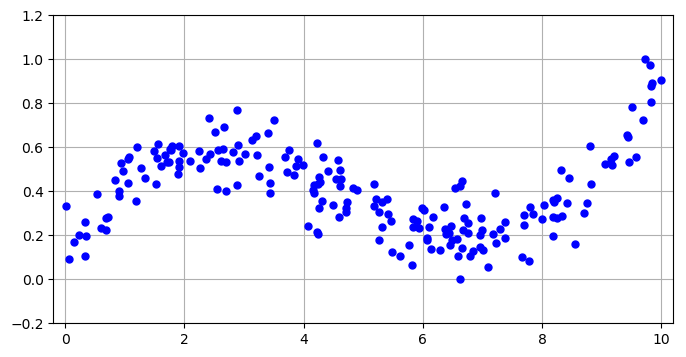

In [19]:
using CSV
using DataFrames
using PyPlot

Df=CSV.read("xy_data.csv", header = false)
#println("Df=", Df)
x=Df[:1]
y=Df[:2]

figure(figsize=(8,4))
plot(x,y,"r.", markersize=10, color="blue")
axis([-0.2,10.2,-0.2,1.2])
grid("on")

In [21]:
using JuMP, ECOS, SCS, LinearAlgebra
m = Model(with_optimizer(SCS.Optimizer))
n=length(x)
A = [x.^3 x.^2 x ones(n)]
@variable(m, u[1:4])
@variable(m, t)
#forma vieja @constraint(m, norm(y - A*u) <= t)
@constraint(m, [t; y - A*u] in SecondOrderCone())

@objective(m, Min, t)

optimize!(m)
termination_status(m)

uopt = value.(u)
topt = value(t)
#println(m)
println("u optim=", uopt)
println("t optim=", topt)

u optim=[0.00844144, -0.119356, 0.434755, 0.103404]
t optim=1.2926448482819677
----------------------------------------------------------------------------
	SCS v2.0.2 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012-2017
----------------------------------------------------------------------------
Lin-sys: sparse-indirect, nnz in A = 797, CG tol ~ 1/iter^(2.00)
eps = 1.00e-05, alpha = 1.50, max_iters = 5000, normalize = 1, scale = 1.00
acceleration_lookback = 20, rho_x = 1.00e-03
Variables n = 5, constraints m = 200
Cones:	soc vars: 200, soc blks: 1
Setup time: 6.50e-05s
----------------------------------------------------------------------------
 Iter | pri res | dua res | rel gap | pri obj | dua obj | kap/tau | time (s)
----------------------------------------------------------------------------
     0| 1.18e+19  3.52e+18  1.00e+00 -5.07e+19  4.18e+17  3.59e+19  1.22e-04 
   100| 3.73e+16  2.54e+16  1.00e+00 -4.88e+18  7.10e+16  4.95e+18  1.99e-02 
   200| 

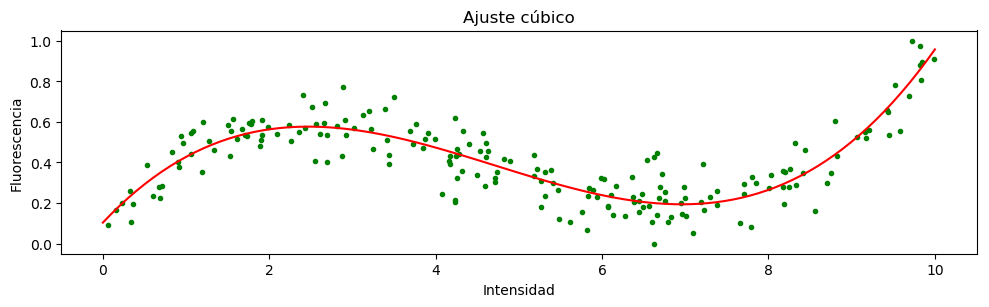

PyObject Text(0.5, 1.0, 'Ajuste cúbico')

In [23]:
xvals = LinRange(0,10,100)
A_values=[xvals.^3 xvals.^2 xvals ones(length(xvals))]
yvals = A_values*uopt
#ylovals = uopt[1]*xvals.^3 + uopt[2]*xvals.^2 + uopt[3]*xvals + uopt[4]*1

using PyPlot
PyPlot.svg(false)
figure(figsize=(10,3))
plot(x,y,"g.")
xlabel("Intensidad")
ylabel("Fluorescencia")
PyPlot.tight_layout()
 

plot(xvals, yvals, "r-")
title("Ajuste cúbico")

In [20]:
using CSV, PyPlot
Df2 = CSV.read("xy_data.csv")
x = Df2[:1]
y = Df2[:2]
x
findall(x.<4)
findall(x.>=4)
indlo = findall(x .< 4) #idxs de valores x < 4 
xlo = x[indlo] 
ylo = y[indlo] 
indhi = findall(x .>= 4) #idxs de valores x>=4
xhi = x[indhi] 
yhi = y[indhi]
using JuMP
using Ipopt
m = Model(with_optimizer(Ipopt.Optimizer))

@variable(m, p[1:3]) #parabola 0 a 4
@variable(m, q[1:3]) #parabola 4 a 10
@constraint(m, p[3] == 0)
@constraint(m, 4^2*p[1] + 4*p[2] + p[3] == 4^2*q[1] + 4*q[2] + q[3]) #parabolas con mismo valor en x=4
@constraint(m, 2*4*p[1] + p[2] == 2*4*q[1] + q[2]) # derivadas iguales en x=4

A_low=[xlo.^2 xlo ones(length(xlo))]
@expression(m,  rlo, A_low * p - ylo) #residuo 0 a 4

A_high=[xhi.^2 xhi ones(length(xhi))]
@expression(m,  rhi, A_high* q - yhi) #residuo 4 a 10

@objective(m, Min, sum(rlo.^2) + sum(rhi.^2))
optimize!(m)
termination_status(m)
popt = value.(p)
qopt = value.(q)

println("popt", popt)
println("qopt", qopt)


This is Ipopt version 3.12.10, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:       11
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:       12

Total number of variables............................:        6
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        3
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 

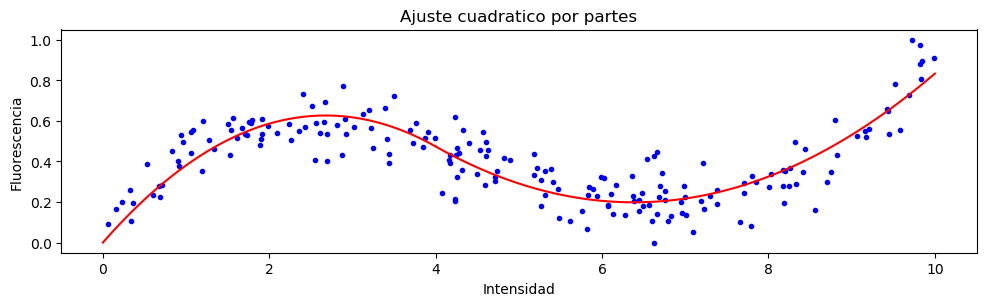

PyObject Text(0.5, 1.0, 'Ajuste cuadratico por partes')

In [18]:
xlovals = LinRange(0,4,100)
A_lowValues=[xlovals.^2 xlovals ones(length(xlovals))]
ylovals = A_lowValues*popt
#ylovals = popt[1]*xlovals.^2 + popt[2]*xlovals + popt[3]

xhivals = LinRange(4,10,100)
A_highValues=[xhivals.^2 xhivals ones(length(xhivals))]
yhivals = A_highValues*qopt
#yhivals = qopt[1]*xhivals.^2 + qopt[2]*xhivals + qopt[3]

using PyPlot
PyPlot.svg(false)
figure(figsize=(10,3))
plot(x,y,"b.")
xlabel("Intensidad")
ylabel("Fluorescencia")
PyPlot.tight_layout()
 

plot(xlovals, ylovals, "r-")
plot(xhivals, yhivals, "r-")
title("Ajuste cuadratico por partes")
